In [2]:
%matplotlib inline 
#有了matplotlib inline 就可以省掉plt.show()了
%load_ext autoreload
%autoreload 2

from __future__ import division
from imports import *
#import pylab #使用pylab模式，可以直接使用numpy、pandas和绘图，而不需要再次引入,会配置为使用你所指定的matplotlib gui后端，还会提供一种更接近于matlab的界面
#%pylab
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle code</button>""", raw=True)
# 允许多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\python27\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
c:\python27\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Toggle code

# 文本挖掘

In [6]:
from sklearn.datasets import load_files

In [5]:
# 导入数据
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
train_path = './csvs/20news-bydate-train/'
test_path = './csvs/20news-bydate-test/'
data_train = load_files(container_path=train_path,categories=categories)
data_test = load_files(container_path=test_path,categories=categories)

### 文本数据特征提取
文本数据属于非结构化的数据，一般要转换成结构化的数据才能够通过机器学习算法进行文本分类。  
常见的做法是将文本转换成“文档-词项矩阵”，矩阵中的元素可以使用词频或TF-IDF值等  
#### TF-IDF值是一种用于信息检索与数据挖掘的常用加权技术。
TF（Term Frequency）词频  
IDF（Inverse Document Frequency）逆向文件频率  
主要思想是：如果某一个词或短语在一篇文章中出现的频率高，并且在其他文章中很少出现，那么认为该词具有很好的类别区分能力

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# 计算词频
count_vect = CountVectorizer(stop_words='english',decode_error='ignore')
X_train_counts = count_vect.fit_transform(data_train.data)
X_train_counts.shape

(11314, 129782)

In [9]:
# 计算TF-IDF
tf_transformer = TfidfVectorizer(stop_words='english',decode_error='ignore')
X_train_counts_tf = tf_transformer.fit_transform(data_train.data)
X_train_counts_tf.shape

(11314, 129782)

### 评估算法

In [10]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [11]:
from sklearn.naive_bayes import MultinomialNB
models = {}
models['LR'] = LogisticRegression()
models['SVM'] = SVC()
models['CART'] = DecisionTreeClassifier()
models['MNB'] = MultinomialNB()
models['KNN'] = KNeighborsClassifier()

# 比较算法
results = []
for key in models:
    kfold = KFold(n_splits=num_folds,random_state=seed)
    cv_results = cross_val_score(models[key],X_train_counts_tf,data_train.target,cv=kfold,scoring=scoring)
    results.append(cv_results)
    print('%s : %f （%f）'%(key,cv_results.mean(),cv_results.std()))

KNN : 0.798657 （0.007198）
MNB : 0.884391 （0.008151）
SVM : 0.050645 （0.013480）
LR : 0.900125 （0.009991）
CART : 0.662807 （0.012353）


{'boxes': [<matplotlib.lines.Line2D at 0x18b2b4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x18b2bb50>,
 'fliers': [<matplotlib.lines.Line2D at 0x18b32350>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18b2be10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x18b2b4b0>,
  <matplotlib.lines.Line2D at 0x192a32f0>]}

[Text(0,0,'KNN'),
 Text(0,0,'MNB'),
 Text(0,0,'SVM'),
 Text(0,0,'LR'),
 Text(0,0,'CART')]

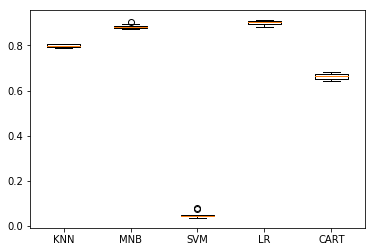

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())

In [16]:
# LR 逻辑回归调参
# 在LR中，超参数是C。C是目标的约束函数，C值越小则正则化强度越大，对C进行调参，每次给C设定一定数量的值，如果临界值是最优参数，重复这个步骤
param_grid = {}
param_grid['C'] = [0.1,5,13,15]
model = LogisticRegression()
kfold = KFold(n_splits=num_folds,random_state=seed)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result = grid.fit(X=X_train_counts_tf,y=data_train.target)
print('最优： %s 使用%s'%(grid_result.best_score_,grid_result.best_params_))

最优： 0.923015732721 使用{'C': 15}
